Training data
from log.txt file that comes with a training  
- train1 : 14 ep, lr (4e-5), bs 1, num_frames 12
- train2 : 14 ep, lr (1e-4), bs 1, num_frames 12
- train3 : 14 ep, lr (4e-5), bs 1, num_frames 13
- train4 : 14 ep, lr (4e-5), bs 1, num_frames 14
- train5 : 14 ep, lr (4e-5), bs 1, num_frames 15

In [96]:
import re
import json

def parse_text_to_dict(text):
    # Split the text into blocks, each block corresponds to one run
    blocks = text.strip().split('\n\n')
    
    result_dict = {}
    
    for block in blocks:
        lines = block.strip().split('\n')
        run_id = lines[0].strip(':')
        
        # Initialize a dictionary for this run
        run_dict = {}
        
        for line in lines[1:]:
            # Extract the key and value using regular expressions
            match = re.match(r'.*\[\s*IoU=\s*(0\.50|0\.75|0\.50:0\.95)\s*\|\s*area=\s*(small|medium|large|all)\s*\|\s*maxDets=(\d+)\s*\]\s*=\s*([\d\.\-]+)', line)
            if match:
                iou, area, max_dets, value = match.groups()
                value = float(value)
                
                # Convert the key to the desired format
                if "AP" in line:
                    key = f"AP_{iou.replace(':', '_')}_{area}_{max_dets}"
                elif "AR" in line:
                    key = f"AR_{iou.replace(':', '_')}_{area}_{max_dets}"
                run_dict[key] = value
            else:
                # Handle lines where the regular expression does not match
                parts = re.split(r'\s*=\s*', line.strip())
                if len(parts) == 5:
                    key ="AR_0.50_0.95_all_"+parts[3][0:2]
                    value = float(parts[4].strip())
                    run_dict[key] = value
                
        result_dict[run_id] = run_dict
    
    return result_dict

runs=[1,2,3,4,5]
for run in runs:
    with open(f'./exps/multi_model_jet/results_runs/results_run_{run}.txt', 'r') as file:
        text = file.read()

    result = parse_text_to_dict(text)
    with open(f'./exps/multi_model_jet/results_runs/results_run_{run}.json', 'w') as json_file:
        json.dump(result, json_file, indent=4)


In [97]:
import json
import os

# Directory where JSON files are located
json_directory = "./exps/multi_model_jet/results_runs"

# Initialize variables to store data from each JSON file
data_dict1 = {}
data_dict2 = {}
data_dict3 = {}
data_dict4 = {}
data_dict5 = {}

# Iterate over each JSON file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        filepath = os.path.join(json_directory, filename)
        # Read the JSON file
        with open(filepath, 'r') as file:
            data = json.load(file)
            # Store data into respective variables based on the file name
            if filename == "results_run_1.json":
                data_dict1 = data
            elif filename == "results_run_2.json":
                data_dict2 = data
            elif filename == "results_run_3.json":
                data_dict3 = data
            elif filename == "results_run_4.json":
                data_dict4 = data
            elif filename == "results_run_5.json":
                data_dict5 = data

# Print the data from each variable
print("Data from file1.json:", data_dict1)
print("Data from file2.json:", data_dict2)
print("Data from file3.json:", data_dict3)
print("Data from file4.json:", data_dict4)
print("Data from file5.json:", data_dict5)


Data from file1.json: {'0': {'AP_0.50_0.95_all_100': 0.05968, 'AP_0.50_all_100': 0.21918, 'AP_0.75_all_100': 0.01973, 'AP_0.50_0.95_small_100': -1.0, 'AP_0.50_0.95_medium_100': 0.05958, 'AP_0.50_0.95_large_100': 0.06115, 'AR_0.50_0.95_all_1 ': 0.12123, 'AR_0.50_0.95_all_10': 0.28026, 'AR_0.50_0.95_all_100': 0.349, 'AR_0.50_0.95_small_100': -1.0, 'AR_0.50_0.95_medium_100': 0.28496, 'AR_0.50_0.95_large_100': 0.38565}, '1': {'AP_0.50_0.95_all_100': 0.08853, 'AP_0.50_all_100': 0.2929, 'AP_0.75_all_100': 0.032, 'AP_0.50_0.95_small_100': -1.0, 'AP_0.50_0.95_medium_100': 0.08562, 'AP_0.50_0.95_large_100': 0.09331, 'AR_0.50_0.95_all_1 ': 0.16335, 'AR_0.50_0.95_all_10': 0.35593, 'AR_0.50_0.95_all_100': 0.41995, 'AR_0.50_0.95_small_100': -1.0, 'AR_0.50_0.95_medium_100': 0.35213, 'AR_0.50_0.95_large_100': 0.45878}, '2': {'AP_0.50_0.95_all_100': 0.10115, 'AP_0.50_all_100': 0.33456, 'AP_0.75_all_100': 0.03578, 'AP_0.50_0.95_small_100': -1.0, 'AP_0.50_0.95_medium_100': 0.08297, 'AP_0.50_0.95_large_1

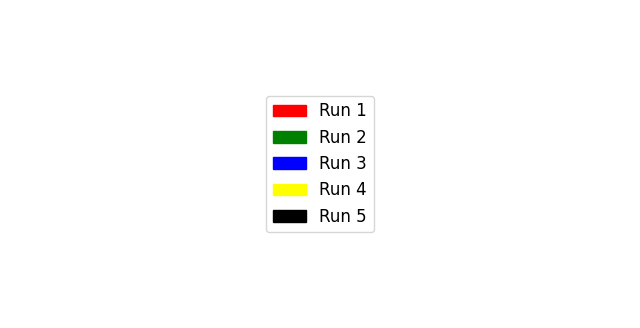

In [98]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the legend labels and corresponding colors
legend_labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']
legend_colors = ['red', 'green', 'blue', 'yellow', 'black']

# Create a list of Patch objects for legend handles
legend_handles = [Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]

# Plot a dummy figure to show the legend
plt.figure(figsize=(8, 4))

# Create the legend with customized handles
plt.legend(handles=legend_handles, loc='center', fontsize='large')

# Remove axis ticks and labels
plt.axis('off')

# Show the plot
plt.show()


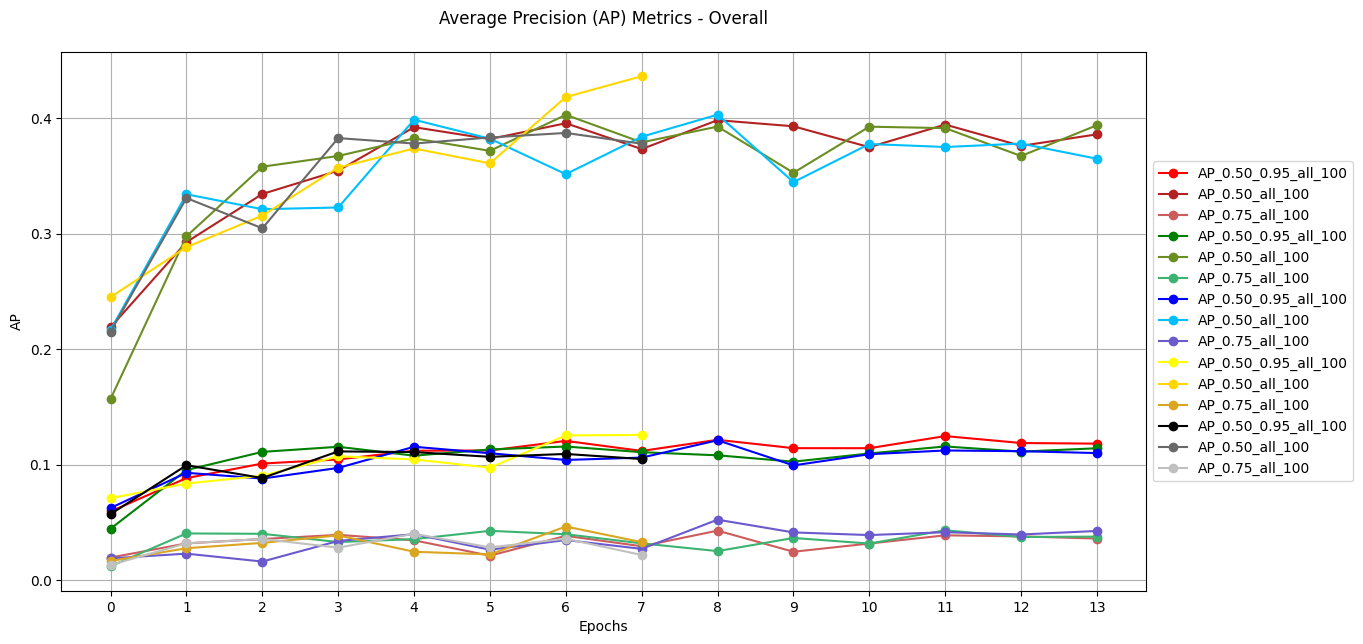

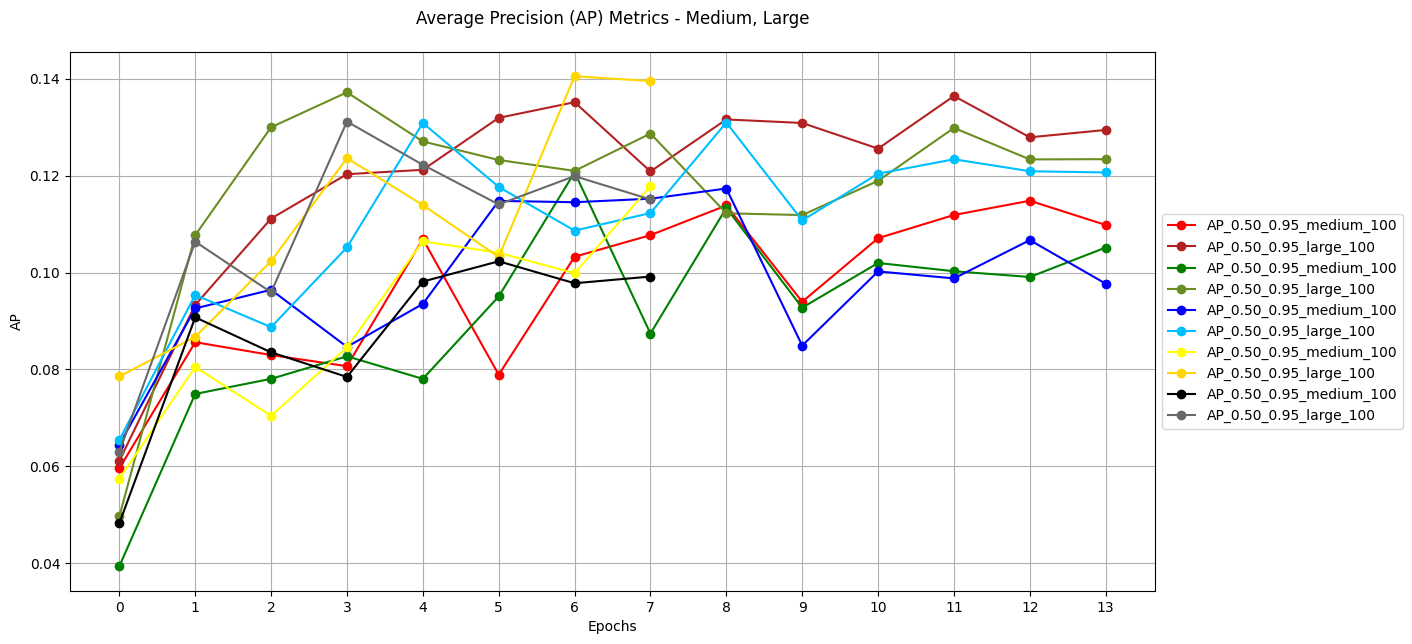

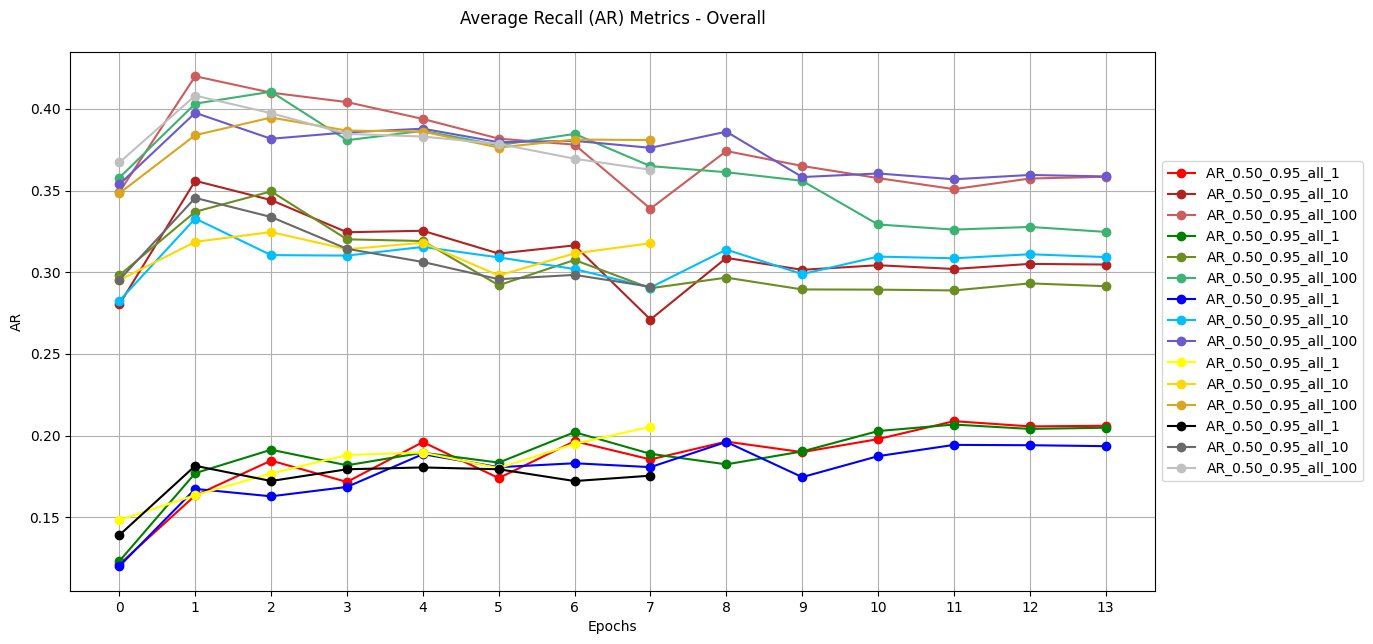

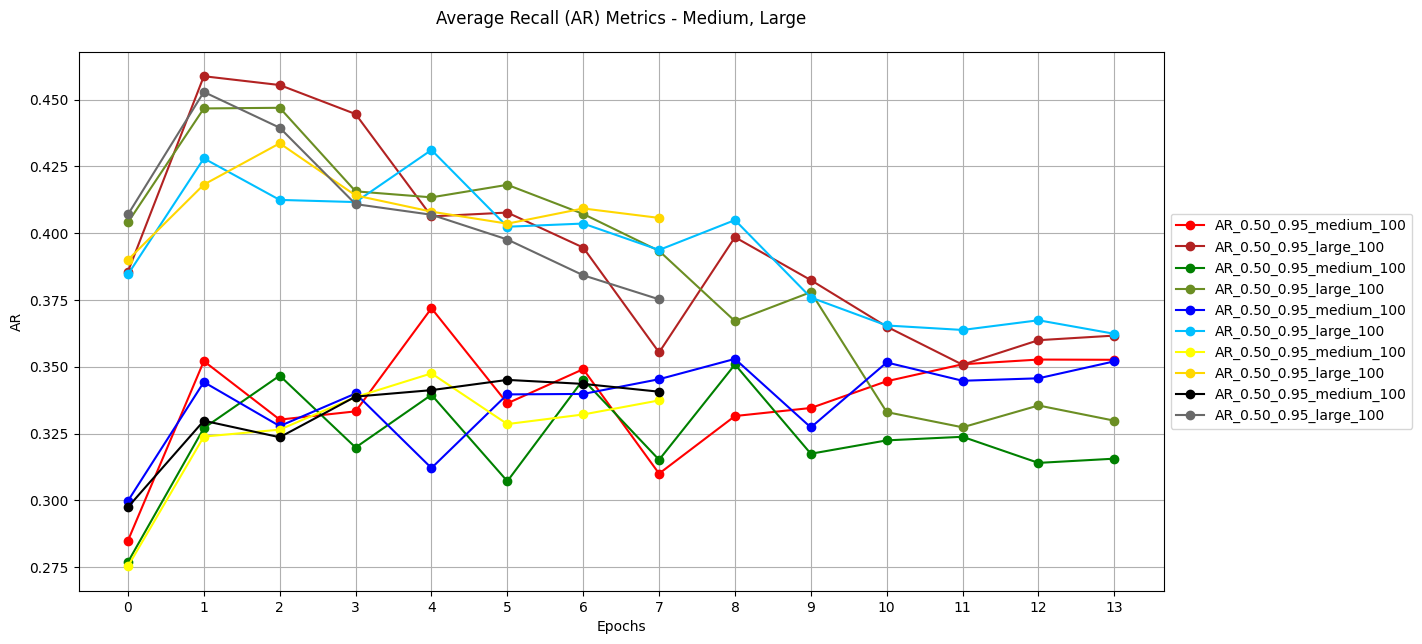

In [99]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for color generation

# Define a color cycle for the plot
color_cycle = ["red","green","blue","yellow","black"]  # Change 5 to the number of data dictionaries you have

# Extract epochs
epochs = list(data_dict1.keys())

# Extract AP and AR metrics
overall_ap_metrics = ['AP_0.50_0.95_all_100', 'AP_0.50_all_100', 'AP_0.75_all_100']
size_ap_metrics = ['AP_0.50_0.95_medium_100', 'AP_0.50_0.95_large_100']
overall_ar_metrics = ['AR_0.50_0.95_all_1 ', 'AR_0.50_0.95_all_10', 'AR_0.50_0.95_all_100']
size_ar_metrics = ['AR_0.50_0.95_medium_100', 'AR_0.50_0.95_large_100']

def plot_metrics(data_dicts, title, ylabel, metrics_to_plot, vertical_line_epochs=None, annotation_texts=None, ):
    plt.figure(figsize=(14, 7))
    
    
    for i, data_dict in enumerate(data_dicts):
        color = color_cycle[i % len(color_cycle)]  # Cycle through the color palette for each data dictionary
        epochs = list(data_dict.keys())
        for a,metric in enumerate(metrics_to_plot):
            if color=="red":
                colors_dict=["red", "firebrick", "indianred"]
            elif color=="green":
                colors_dict=["green","olivedrab", "mediumseagreen"]
            elif color=="blue":
                colors_dict=["blue","deepskyblue", "slateblue"]
            elif color=="yellow":
                colors_dict=["yellow","gold", "goldenrod"]
            elif color=="black":
                colors_dict=["black","dimgray", "silver"]

            values = [data_dict[epoch][metric] for epoch in epochs]
            plt.plot(epochs, values, marker='o', label=metric, color=colors_dict[a])
    
    # Add vertical lines and annotations
    if vertical_line_epochs is not None and annotation_texts is not None:
        for i in range(len(vertical_line_epochs)):
            plt.axvline(x=vertical_line_epochs[i], color='red', linestyle='--', linewidth=2)
            # Position the text just above the grid of the plot
            
    
    plt.title(title, pad=20)  # Adjust the pad value to move the title higher
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

# Example usage with multiple data dictionaries
plot_metrics([data_dict1, data_dict2, data_dict3, data_dict4, data_dict5], 'Average Precision (AP) Metrics - Overall', 'AP', overall_ap_metrics)

# Plot Average Precision (Small, Medium, Large) with a single vertical line and annotation
plot_metrics([data_dict1, data_dict2, data_dict3, data_dict4, data_dict5], 'Average Precision (AP) Metrics - Medium, Large', 'AP', size_ap_metrics)

# Plot Average Recall (Overall) with a single vertical line and annotation
plot_metrics([data_dict1, data_dict2, data_dict3, data_dict4, data_dict5], 'Average Recall (AR) Metrics - Overall', 'AR', overall_ar_metrics)

# Plot Average Recall (Small, Medium, Large) with a single vertical line and annotation
plot_metrics([data_dict1, data_dict2, data_dict3, data_dict4, data_dict5], 'Average Recall (AR) Metrics - Medium, Large', 'AR', size_ar_metrics)


# Plot for the Temporal Window hyperparameter

runs : 1,3,4,5

In [101]:
dicts = [data_dict1, data_dict3, data_dict4, data_dict5]

max_values = {}

# Iterate over each dictionary
for idx, d in enumerate(dicts):
    max_value = float('-inf')
    for epoch, values in d.items():
        if 'AP_0.50_all_100' in values:
            if values['AP_0.50_all_100'] > max_value:
                max_value = values['AP_0.50_all_100']
    max_values[f'dict{idx+1}'] = max_value if max_value != float('-inf') else None

# Print the results
for dict_name, max_value in max_values.items():
    if max_value is not None:
        print(f"The maximum value for 'AP_0.50_all_100' in {dict_name} is: {max_value}")
    else:
        print(f"The key 'AP_0.50_all_100' was not found in {dict_name}.")

The maximum value for 'AP_0.50_all_100' in dict1 is: 0.39847
The maximum value for 'AP_0.50_all_100' in dict2 is: 0.40325
The maximum value for 'AP_0.50_all_100' in dict3 is: 0.43652
The maximum value for 'AP_0.50_all_100' in dict4 is: 0.38741


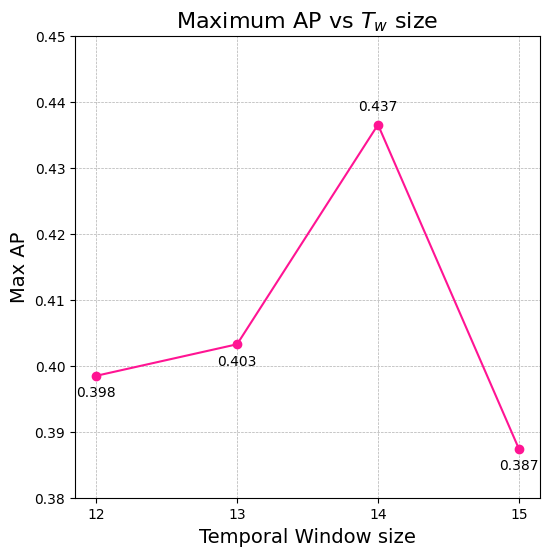

In [119]:
# Data
max_tw = [0.39847, 0.40325, 0.43652, 0.38741]
tw = [12, 13, 14, 15]

# Create the plot
plt.figure(figsize=(6, 6))  # Set the figure size

# Plot the data
plt.plot(tw, max_tw, marker='o', linestyle='-', color='deeppink')

# Adding title and labels
plt.title('Maximum AP vs $T_w$ size', fontsize=16)
plt.xlabel('Temporal Window size', fontsize=14)
plt.ylabel('Max AP', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


# Adding annotations for each data point
for i in range(len(tw)):
    if i==2:
        plt.annotate(f'{max_tw[i]:.3f}', (tw[i], max_tw[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    else:
        plt.annotate(f'{max_tw[i]:.3f}', (tw[i], max_tw[i]), textcoords="offset points", xytext=(0, -15), ha='center')
# Set the range for y-axis for better visualization
plt.ylim(0.38, 0.45)

# Set the x-axis ticks to only display the specific TW values
plt.xticks(tw)

# Show the plot
plt.show()
